In [1]:
import tensorflow as tf
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from image_classification.datasets.dataset import Dataset

In [2]:
ds = Dataset()

In [3]:
from image_classification.code.model_ops import ModelOPS
from image_classification.configs.model_config import ModelConfig
from sklearn.model_selection import train_test_split

mo = ModelOPS()

In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
train_images_path = glob.glob(ModelConfig.TRAIN_IMAGE_DIR_PATH)
test_images_path = glob.glob(ModelConfig.TEST_IMAGE_DIR_PATH)
train_labels = [int(image_path.split("/")[-2]) for image_path in train_images_path]
train_x, val_x, train_y, val_y = train_test_split(train_images_path, train_labels,
                                                      test_size=0.1, random_state=42)
if ModelConfig.USE_TFRecords:
    if not os.path.exists(ModelConfig.TFRecords_DIR):
        os.makedirs(ModelConfig.TFRecords_DIR, exist_ok=True)
    train_file = os.path.join(ModelConfig.TFRecords_DIR, 'train.tfrecords')
    val_file = os.path.join(ModelConfig.TFRecords_DIR, 'val.tfrecords')
    test_file = os.path.join(ModelConfig.TFRecords_DIR, 'test.tfrecords')
    train_full = os.path.join(ModelConfig.TFRecords_DIR, 'train_full.tfrecords')
    if not os.path.isfile(train_file):
        ds.write_tf_records(train_x, train_file, labels=train_y)
    if not os.path.isfile(val_file):
        ds.write_tf_records(val_x, val_file, labels=val_y)
    if not os.path.isfile(test_file):
        ds.write_tf_records(test_images_path, test_file)
    if not os.path.isfile(train_full):
        ds.write_tf_records(train_images_path, train_full, labels=train_labels)

    train_dataset, train_dataset_itr = ds.get_tf_record_dataset([train_file])
    val_dataset, val_dataset_itr = ds.get_tf_record_dataset([val_file], op='val')
    test_dataset, test_dataset_itr = ds.get_tf_record_dataset([test_file], has_labels=False, op='test')
    full_train_dataset, full_train_dataset_itr = ds.get_tf_record_dataset([train_full])
else:
    train_dataset, train_dataset_itr = ds.get_dataset(train_x, labels=train_y)
    val_dataset, val_dataset_itr = ds.get_dataset(val_x, labels=val_y, op='val')
    test_dataset, test_dataset_itr = ds.get_dataset(test_images_path, op='test')
    full_train_dataset, full_train_dataset_itr = ds.get_dataset(train_images_path, labels=train_labels)

2022-01-09 01:43:22.029467: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-09 01:43:22.053514: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-09 01:43:22.053529: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: vikash-MS-7C56
2022-01-09 01:43:22.053533: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: vikash-MS-7C56
2022-01-09 01:43:22.053599: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.91.3
2022-01-09 01:43:22.053612: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.91.3
2022-01-09 01:43:22.053614: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.91.3
2022-01-09 01:43:22.053893: I tensorflow/core/platform

In [6]:
images, labels = [], []
for idx, batch in enumerate(train_dataset):
    images, labels = mo.get_batch_data(batch)
    break

/home/vikash/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


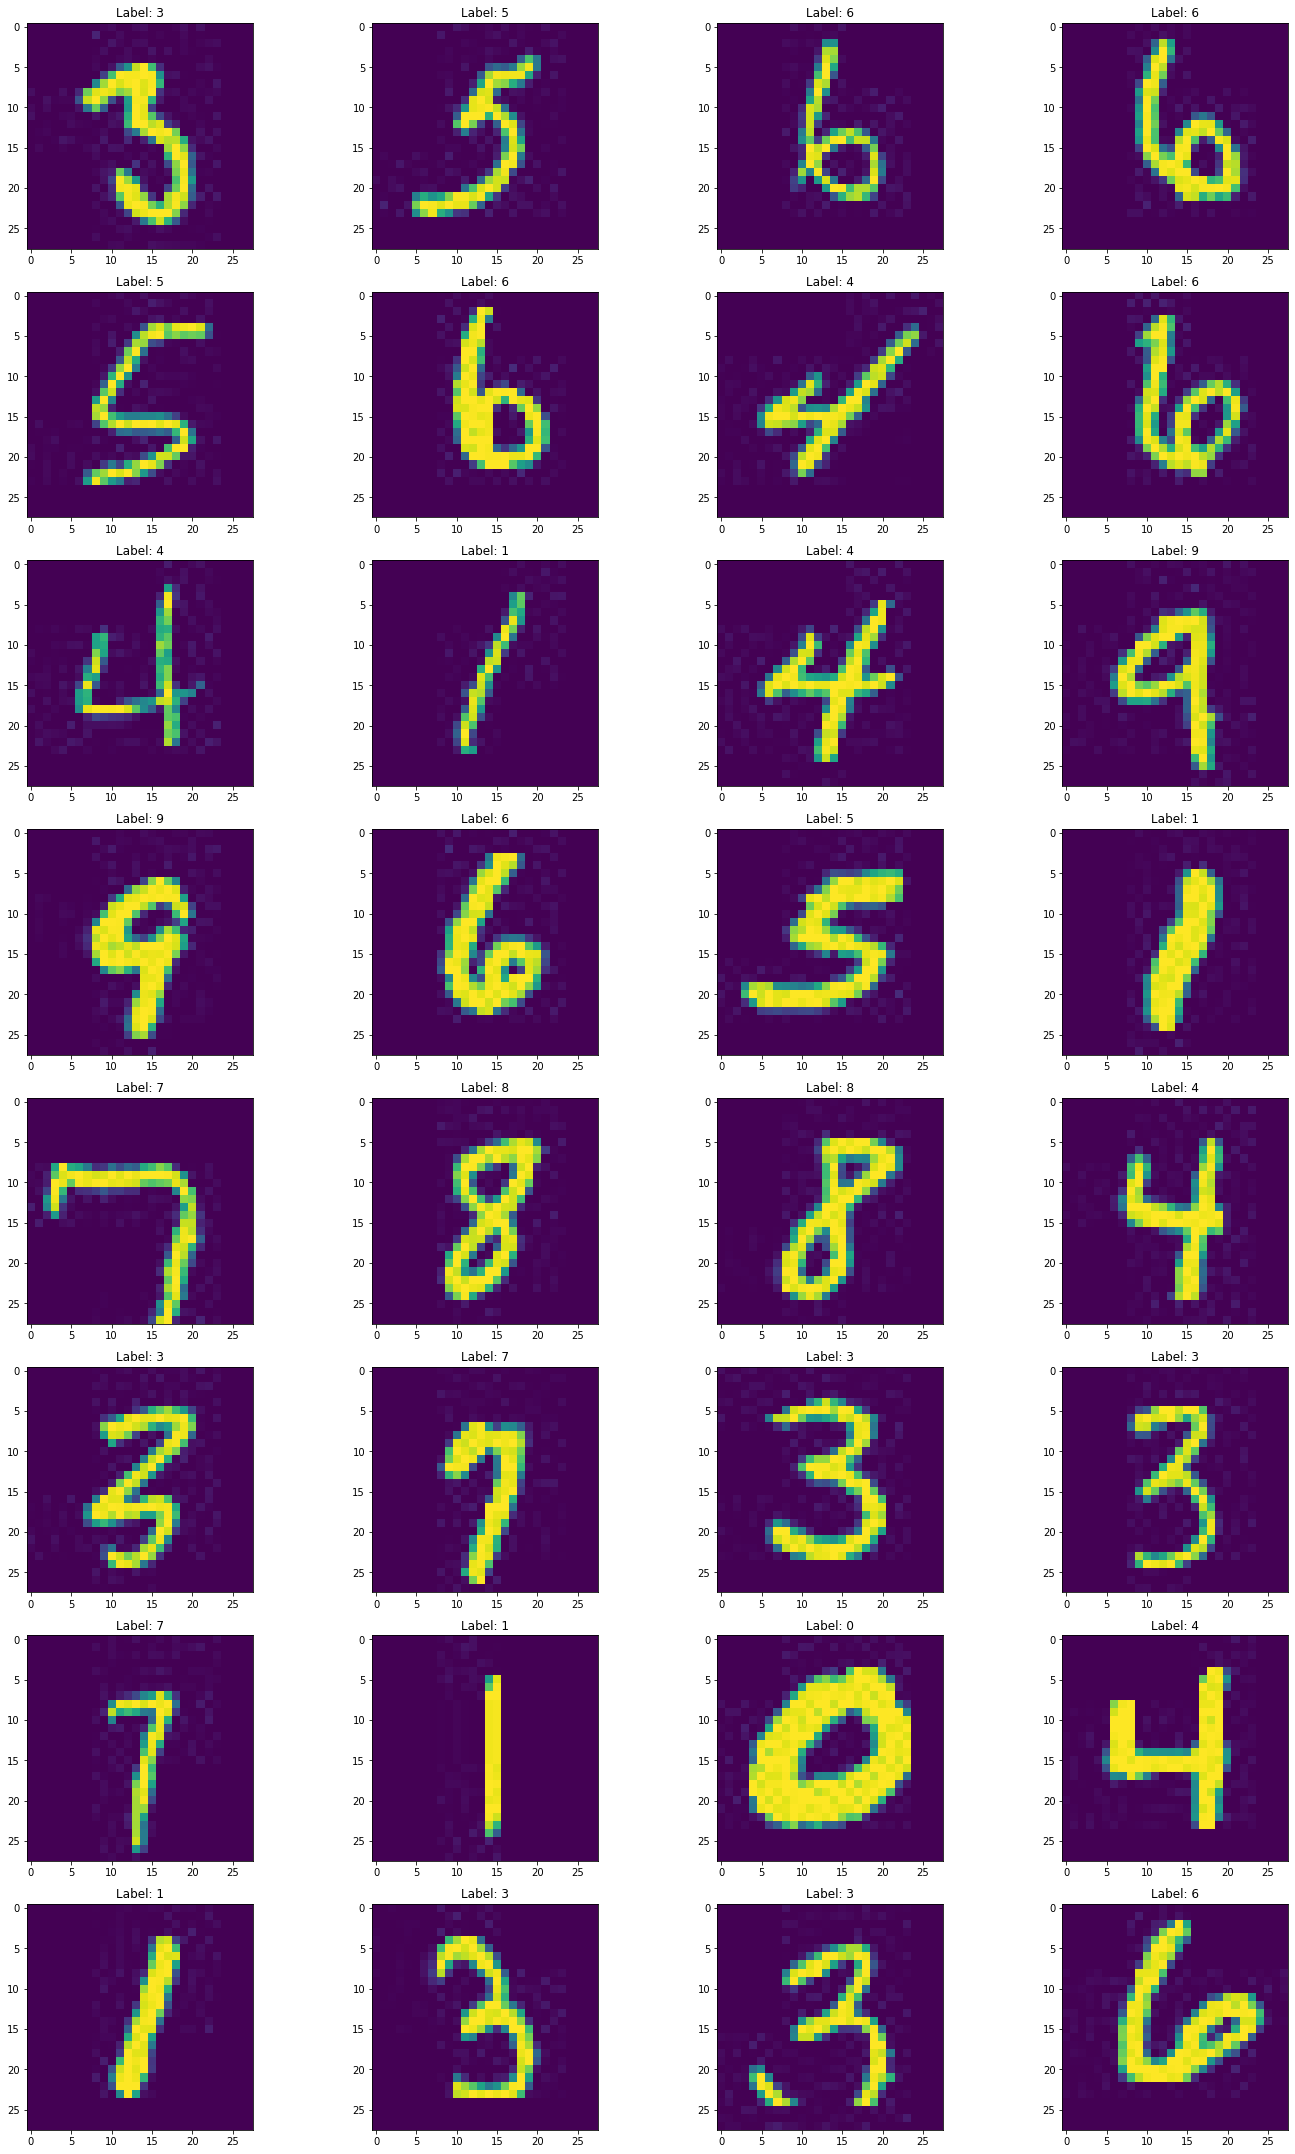

In [16]:
import numpy as np
def visualize_images(images, labels, figsize, nrows, ncols=None):
    if ncols is None:
        ncols = images.shape[0]//nrows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    # plot simple raster image on each sub-plot
    for i, axi in enumerate(ax.flat):
        img = images[i-1]
        axi.imshow(img)
        rowid = i // ncols
        colid = i % ncols
        axi.set_title(f"Label: {np.argmax(labels[i-1])}")
    plt.tight_layout(True)
    plt.show()
    
visualize_images(images, labels, (20, 30), 8)